In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, kpss

plt.rcParams["figure.figsize"] = (12, 4)


In [2]:
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

df.head(), df.tail(), df.columns


(        Date  Price
 0  20-May-87  18.63
 1  21-May-87  18.45
 2  22-May-87  18.55
 3  25-May-87  18.60
 4  26-May-87  18.63,
               Date  Price
 9006  Nov 08, 2022  96.85
 9007  Nov 09, 2022  93.05
 9008  Nov 10, 2022  94.25
 9009  Nov 11, 2022  96.37
 9010  Nov 14, 2022  93.59,
 Index(['Date', 'Price'], dtype='str'))

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df.isna().sum(), df.dtypes, df.shape


C:\Users\Hp\AppData\Local\Temp\ipykernel_3276\2826129197.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


(Date     0
 Price    0
 dtype: int64,
 Date     datetime64[us]
 Price           float64
 dtype: object,
 (9011, 2))

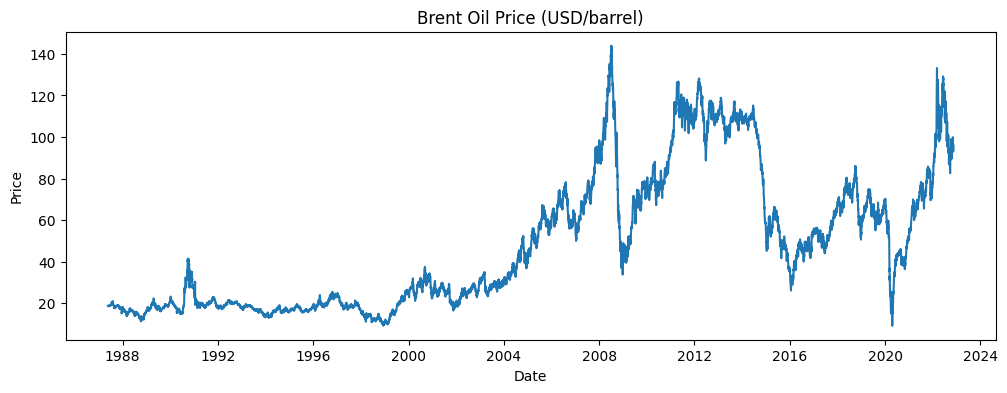

In [4]:
plt.figure()
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Price (USD/barrel)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [5]:
df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()

df[["Date", "Price", "log_price", "log_return"]].head(10)


,Date,Price,log_price,log_return
0,1987-05-20,18.63,2.924773,NaN
1,1987-05-21,18.45,2.915064,-0.009709
2,1987-05-22,18.55,2.920470,0.005405
3,1987-05-25,18.60,2.923162,0.002692
4,1987-05-26,18.63,2.924773,0.001612
5,1987-05-27,18.60,2.923162,-0.001612
6,1987-05-28,18.60,2.923162,0.000000
7,1987-05-29,18.58,2.922086,-0.001076
8,1987-06-01,18.65,2.925846,0.003760
9,1987-06-02,18.68,2.927453,0.001607


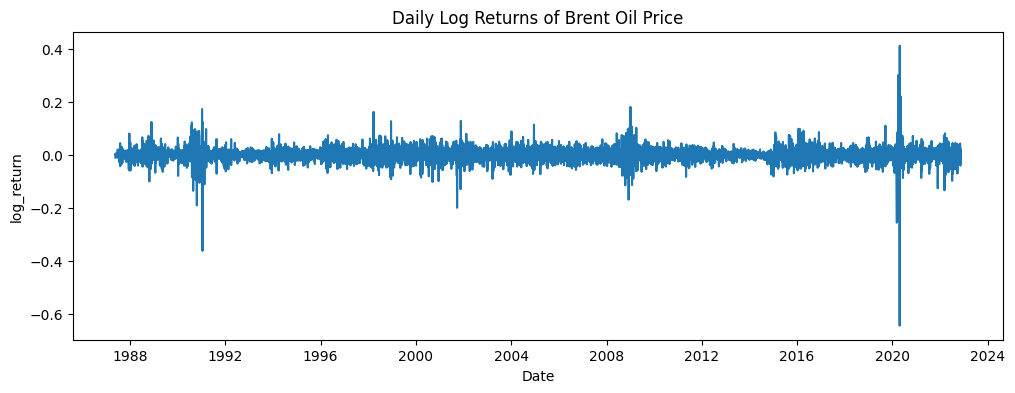

In [6]:
plt.figure()
plt.plot(df["Date"], df["log_return"])
plt.title("Daily Log Returns of Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("log_return")
plt.show()


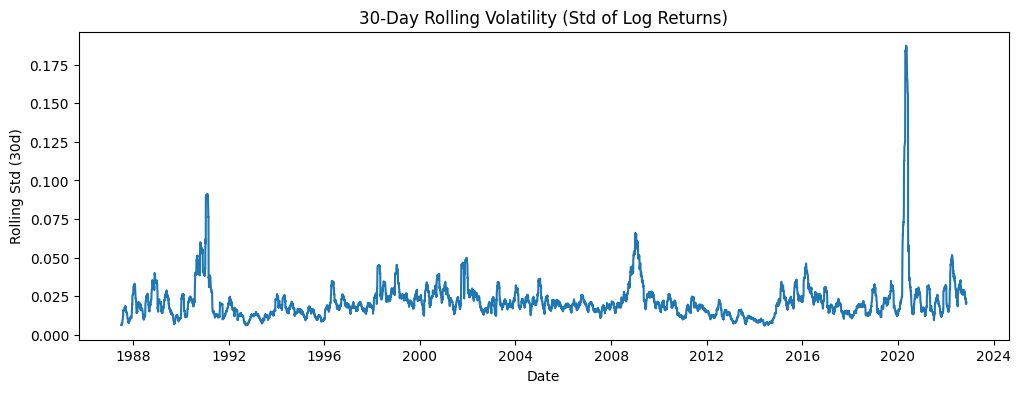

In [7]:
df["vol_30d"] = df["log_return"].rolling(30).std()

plt.figure()
plt.plot(df["Date"], df["vol_30d"])
plt.title("30-Day Rolling Volatility (Std of Log Returns)")
plt.xlabel("Date")
plt.ylabel("Rolling Std (30d)")
plt.show()


In [8]:
def adf_test(series, name="series"):
    series = series.dropna()
    stat, p, *_ = adfuller(series, autolag="AIC")
    return {"test":"ADF", "name":name, "stat":stat, "p_value":p}

def kpss_test(series, name="series", regression="c"):
    series = series.dropna()
    stat, p, *_ = kpss(series, regression=regression, nlags="auto")
    return {"test":"KPSS", "name":name, "stat":stat, "p_value":p}

results = []
results.append(adf_test(df["Price"], "Price"))
results.append(kpss_test(df["Price"], "Price", regression="c"))

results.append(adf_test(df["log_return"], "Log Return"))
results.append(kpss_test(df["log_return"], "Log Return", regression="c"))

pd.DataFrame(results)


C:\Users\Hp\AppData\Local\Temp\ipykernel_3276\2091102146.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, *_ = kpss(series, regression=regression, nlags="auto")
C:\Users\Hp\AppData\Local\Temp\ipykernel_3276\2091102146.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, *_ = kpss(series, regression=regression, nlags="auto")


,test,name,stat,p_value
0,ADF,Price,-1.993856,2.892735e-01
1,KPSS,Price,9.558800,1.000000e-02
2,ADF,Log Return,-16.427113,2.498580e-29
3,KPSS,Log Return,0.034274,1.000000e-01
